# ¿Qué vende un coche?

 Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.



- [Propósitos](#Propósitos)
- [Inicialización](#Inicialización)
- [Exploración inicial](#Exploración-inicial)
- [Conclusiones y siguientes pasos](#Conclusiones-y-siguientes-pasos)
- [Tratamiento de los valores ausentes](#Tratamiento-de-los-valores-ausentes)
- [Corregir los tipos de datos](#Corregir-los-tipos-de-datos)
- [Enriquecimiento de datos](#Enriquecimiento-de-datos)
- [Comprobacion de datos limpios](#Comprobacion-de-datos-limpios)
- [Estudio de parámetros principales](#Estudio-de-parámetros-principales)
- [Estudio y tratamiento de valores atípicos](#Estudio-y-tratamiento-de-valores-atípicos)
- [Estudio de parámetros principales sin valores atípicos](#Estudio-de-parámetros-principales-sin-valores-atípicos) 
- [Conclusiones de parámetros principales](#Conclusiones-de-parámetros-principales) 
- [Periodo de colocación de los anuncios](#Periodo-de-colocación-de-los-anuncios)
- [Precio promedio por cada tipo de vehículo](#Precio-promedio-por-cada-tipo-de-vehículo)
- [Factores de precio](#Factores-de-precio)
- [Conclusiones Generales](#Conclusiones-Generales)

## Propósitos
<h1>Propósito General</h1>
Analizar los anuncios de los diferentes vehículos postulados en Crankshaft List a fin de determinar la correlación que surge a partir de las caracteristicas de los mismos, tomando en cuenta algunos datos que nos aportan el grupo de desarrolladores.
<br>

<h2>Propósitos particulares</h2>
<ul>
<li>
Preprocesar los datos de forma que se encuentra la mayor utibilidad posible para el análisis. 
</li>
<li>
Ordenar los datos de acuerdo a las caracteristicas que influyen directamente en el precio de un vehículo como lo es edad del vehículo, millaje, condición, tipo de transmisión y color.
</li>
<li>
Graficar los resultados con el objetivo de visualizar los resultados. 
</li>
<li>
Dar una conclusión que permita compartir los resultados de forma sencilla y adecuada para los grupos interesados. 
</li>
</ul>



## Inicialización



In [2]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<h1 id='cargardatos'>Cargar datos</h1>



In [3]:
# Carga el archivo de datos en un DataFrame

df = pd.read_csv('./vehicles_us.csv')
#df = pd.read_csv('/datasets/vehicles_us.csv')


## Exploración inicial

El dataset contiene los siguientes campos:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [4]:
# imprime la información general/resumida sobre el DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  object 
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 5.1+ MB


In [5]:
# imprimir una muestra de datos
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17



Lo que se observan son algunas columnas con datos null entre estas se encuentran la columnas de [model_year, cylinders, odometer,paint_color , is_4wd]


In [6]:
df.describe()

,model_year,cylinders,odometer,is_4wd,days_listed
count,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,2009.750470,6.125235,115553.461738,1.0,39.55476
std,6.282065,1.660360,65094.611341,0.0,28.20427
min,1908.000000,3.000000,0.000000,1.0,0.00000
25%,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,2014.000000,8.000000,155000.000000,1.0,53.00000
max,2019.000000,12.000000,990000.000000,1.0,271.00000



<hr>
se observa que algunos deben cambiar de tipo para su mejor procesamiento entres estos se encuentran los siguientes:

<ul>
<li>
cylinders ====> int 
</li>
<li>
is_4wd ====> int 
</li>
<li>
model_year ====> int 
</li>
<li>
odometer ====> int 
</li>
<li>
price ====> float 
</li>
</ul>


In [7]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


<hr>
La columna is_4wd conserva el mayor numero de datos ausentes, lo cual debe de fijarse como uno de los principales objetivos.


In [8]:
df['is_4wd'].isna().sum()

25953

## Conclusiones y siguientes pasos



Los valores que se notan anormales  son los pertenecientes a las siguientes columnas: 
<ul>
<li>
cylinders 
</li>
<li>
is_4wd  
</li>
<li>
model_year 
</li>
<li>
odometer 
</li>
<li>
price 
</li>
</ul>
Debido a que utilizan datos #float y no #integer como se esperaría que pasara.

Observo que los datos faltantes pueden ser construidos a partir de datos de otras columnas, los pasos que puedo seguir para dar un trato adecuado a los datos podria ser el siguiente proceso:

1.- Verificar si algunos autos comparten datos null en diferentes columnas con el fin de minimizar un posible sesgo, ejemplo, tratar de calcular la mediana con datos sesgados.
<p>
2.- Verificar si la mediana no esta sesgada por datos diferentes de forma visual con un grafico de barras, entre las columnas que me permiten calcular los datos faltantes , ejemplo:
<p>
is_4wd = model - type
<p>
odometer = model - model_year
<p>
model_year = odometer - model
<p>
cylinder = model 
<p>
paint color = model

3.- Rellenar los datos
<p>
4.- En caso de ser necesario borrarlos.


<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Recorda eliminar lo que esta entre corchetes, son meras guias para el alumno</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor #3</b> <a class="tocSkip"></a>

Sigue presente el mismo error</div>



<div class="alert alert-block alert-success">

<b>Comentario del revisor #4</b> <a class="tocSkip"></a>

Corregido muy bien!.</div>

In [9]:
df.isna().sum()
data_vehicle = df
data_vehicle

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


## Tratamiento de los valores ausentes




1.- Dado a que los datos null son muchos se procederan a rellenar, para esto se agruparan datos los cuales se comprobarán con una función para ser asignados por esta.
<p>
2.- Se asignarán las funciones y se verificará los datos.


In [10]:

#To comprobate data
before_data = df.isna().sum()
print("Valores nulos antes de la imputación:")
print(before_data)

#df["model_year_group"] = pd.cut(df['model_year'], bins=model_year_groups)

# Calcular el promedio de 'odometer' por grupo de año de modelo y condición
odometer_mean_by_model_year = (
    df
    .groupby(["model", "condition"])["odometer"]
    .mean()
)

# Función para llenar valores nulos en 'odometer'
def fill_na_odometer(row):
    model = row['model']
    condition = row['condition']
    if pd.isna(row["odometer"]):
        mean_value = odometer_mean_by_model_year.get((model, condition))
        if mean_value is not None:
            return mean_value
        else:
            return row['odometer']
    else:
        return row['odometer']


# Imputar valores nulos en la columna 'is_4wd'
df["is_4wd"] = df["is_4wd"].fillna(False)
# Imputar valores nulos en la columna 'paint_color'
df["paint_color"] = df["paint_color"].fillna('Unknown')
# Calcular el modo de 'cylinders' por modelo
cylinder_mode_by_model = (
    df
    .groupby(["model", "cylinders"])["price"]
    .count()
    .reset_index()
    .rename(columns={"price": "n_vehicles"})
    .sort_values(by="n_vehicles", ascending=False)
    .groupby("model")
    .head(1)
    .sort_values(by="model")
)

# Función para llenar valores nulos en 'cylinders'
def fill_na_cylinder(row):
    model = row['model']
    if pd.isna(row["cylinders"]):
        mode_value = cylinder_mode_by_model[cylinder_mode_by_model["model"] == model]["cylinders"]
        if not mode_value.empty:
            return mode_value.values[0]
        else:
            return row['cylinders']
    else:
        return row['cylinders']


model_mean_by_model = (
    df
    .groupby(['model', 'model_year'])['price']
    .count()
    .reset_index()
    .rename(columns={"price": "n_vehicles"})
    .sort_values(by="n_vehicles", ascending=False)
    .groupby("model")
    .head(1)
    .sort_values(by="model")
)


# Función para llenar valores nulos en 'model_year'
def fill_na_model_year(row):
    model = row['model']
    if pd.isna(row["model_year"]):
        mode_value = model_mean_by_model[model_mean_by_model["model"] == model]["model_year"]
        if not mode_value.empty:
            return mode_value.values[0]
        else:
            return row['model_year']
    else:
        return row['model_year']


# Aplicar la función a la columna 'cylinders'
df['cylinders'] = df.apply(fill_na_cylinder, axis=1)
# Aplicar la función a la columna 'odometer'
df['odometer'] = df.apply(fill_na_odometer, axis=1)
# Aplicar la función a la columna 'model_year'
df['model_year'] = df.apply(fill_na_model_year, axis=1)


df["odometer"] = df["odometer"].fillna(False)


# Mostrar la cantidad de valores nulos después de la imputación
df.isna().sum()

model_mean_by_model
df.isna().sum()
 



Valores nulos antes de la imputación:
price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Idea general
<br>
Se podarón los datos de la columna is_4wd y paint_color a partir de borrar sus datos nullos y rellenarlos con palabras clave, como lo es False para la primera columna y Unknown para la segunda.

<br>
Para la columna odometer se realizó una agrupación por medio de model y condition para recuperar los valores medios de odometer, elegidos por que son datos completos en los datos,despúes se realizó un función que recupera el valor de la agrupación para rellenar el dato en caso de que este no tenga valor , escrito en la condicionales if , por último retorna el valor.

<br>

En el caso de la columna con datos nullo Cylinders se realiza la agrupacion por modelo y cyllinders para calcular el numero de veces común que tiene cada modelo en la columna cylinders, agrupados por precio, lo cual se toma en cuenta por qué es un dato no faltante del data frame, ordenado por modelo y descendencia , a fin de solo mostrar los datos que más se repiten por modelo.Se realizó una función que permita verificar las filas con ayuda de los datos pertenecientes a la columna model y cylinders, se hace una variable que guarde los valores comprobados por model para recuperar el valor de la agrupación que se hizo con anterioridad , con el fin de recuperar el número de cilindros y asigna el valor que se encuentra, si el valor es empty, en el caso que no sea solo se regresa el valor de la fila cylinders.

El mismo mecanismo se realiza para el modelo.

Los valores faltantes de odometer se rellenan con False.

Se realizá los comprobaciones para asegurarnos que no existen datos nulos.



## Corregir los tipos de datos




Se han corregido los tipos de datos y se ha observado que la columna date_posted necesitaba también un cambio de formato.


In [11]:
# corregir los datos float en int
df['cylinders'] = pd.to_numeric(df['cylinders']).astype('Int64')
df['is_4wd'] = pd.to_numeric(df['is_4wd']).astype('bool')
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d %H:%M:%S')

## Enriquecimiento de datos



Adding data to date_posted through pd.datetime

In [12]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d') + pd.DateOffset(hours=12)
df["weekday"] = df["date_posted"].dt.day_name()
df["month"] = df["date_posted"].dt.to_period("M")
df["year"] = df["date_posted"].dt.year

In [13]:
# Agrega los años del vehículo cuando el anuncio se colocó
#function to create data year
def car_year_posted(row):
    vehicle_age = row['date_posted'].year
    age_years = vehicle_age - row['model_year']
    
    if(row['model_year'] != 0):
        return age_years
    else:
        return 0
    
    df['car_age'] = df.apply(car_year_posted,axis=1)

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_age
0,9400.0,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23 12:00:00,19,Saturday,2018-06,2018,7.0
1,25500.0,2013.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19 12:00:00,50,Friday,2018-10,2018,5.0
2,5500.0,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07 12:00:00,79,Thursday,2019-02,2019,6.0
3,1500.0,2003.0,ford f-150,fair,8,gas,181921.159091,automatic,pickup,Unknown,False,2019-03-22 12:00:00,9,Friday,2019-03,2019,16.0
4,14900.0,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02 12:00:00,28,Tuesday,2019-04,2019,2.0
5,14990.0,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20 12:00:00,15,Wednesday,2018-06,2018,4.0
6,12990.0,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27 12:00:00,73,Thursday,2018-12,2018,3.0
7,15990.0,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07 12:00:00,68,Monday,2019-01,2019,6.0
8,11500.0,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Unknown,True,2018-07-16 12:00:00,19,Monday,2018-07,2018,6.0
9,9200.0,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15 12:00:00,17,Friday,2019-02,2019,11.0


In [14]:
# adding average mileage by car

for model in df['model'].unique():
    for model_year in df['model_year'].unique():
        condition = (df['model'] == model) & (df['model_year'] == model_year)
        mean_value = df[(df['model'] == model) & (df['model_year'] == model_year)]['odometer'].mean()
        df.loc[condition,'average_mileage'] = mean_value


df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_age,average_mileage
0,9400.0,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23 12:00:00,19,Saturday,2018-06,2018,7.0,107676.694965
1,25500.0,2013.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19 12:00:00,50,Friday,2018-10,2018,5.0,115594.003482
2,5500.0,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07 12:00:00,79,Thursday,2019-02,2019,6.0,107123.675070
3,1500.0,2003.0,ford f-150,fair,8,gas,181921.159091,automatic,pickup,Unknown,False,2019-03-22 12:00:00,9,Friday,2019-03,2019,16.0,172246.818781
4,14900.0,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02 12:00:00,28,Tuesday,2019-04,2019,2.0,82599.799528
5,14990.0,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20 12:00:00,15,Wednesday,2018-06,2018,4.0,114942.314299
6,12990.0,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27 12:00:00,73,Thursday,2018-12,2018,3.0,79693.141061
7,15990.0,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07 12:00:00,68,Monday,2019-01,2019,6.0,116873.237425
8,11500.0,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Unknown,True,2018-07-16 12:00:00,19,Monday,2018-07,2018,6.0,95406.690897
9,9200.0,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15 12:00:00,17,Friday,2019-02,2019,11.0,145250.800000


In [15]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
# adding condition_int to df
condition_mapping = {
     'new': 5,
     'excellent': 4,
     'like new': 3,
     'good': 2,
     'fair': 1,
     'salvage': 0
 }

df["condition_int"] = df["condition"].replace(condition_mapping)

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_age,average_mileage,condition_int
0,9400.0,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23 12:00:00,19,Saturday,2018-06,2018,7.0,107676.694965,2
1,25500.0,2013.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19 12:00:00,50,Friday,2018-10,2018,5.0,115594.003482,2
2,5500.0,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07 12:00:00,79,Thursday,2019-02,2019,6.0,107123.675070,3
3,1500.0,2003.0,ford f-150,fair,8,gas,181921.159091,automatic,pickup,Unknown,False,2019-03-22 12:00:00,9,Friday,2019-03,2019,16.0,172246.818781,1
4,14900.0,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02 12:00:00,28,Tuesday,2019-04,2019,2.0,82599.799528,4
5,14990.0,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20 12:00:00,15,Wednesday,2018-06,2018,4.0,114942.314299,4
6,12990.0,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27 12:00:00,73,Thursday,2018-12,2018,3.0,79693.141061,4
7,15990.0,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07 12:00:00,68,Monday,2019-01,2019,6.0,116873.237425,4
8,11500.0,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Unknown,True,2018-07-16 12:00:00,19,Monday,2018-07,2018,6.0,95406.690897,4
9,9200.0,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15 12:00:00,17,Friday,2019-02,2019,11.0,145250.800000,4



Conclusión

Durante esta sección se enriquecieron los datos aplicando diversas caracteristicas, entre estas se encuentran las siguientes:

Aplicación de un nuevo formato que integra la hora.

Aplicación de tres columnas categorizadas por [weekday] [month] [year] aplicado con ayuda de la columna [date_posted]

Incoporación de columna [car_age] que calcula los años del vehículo al momento de publicarse.

Adición de columna [average_mileage] la cual se desarrolla  a partir de la media de los odometros por año y modelo.

Aplicación de columna [condition_int] la cual rellena datos numericos de acuerdo a las categorias. 


## Comprobacion de datos limpios


Checking data to determine the differences.


In [16]:
# imprime la información general/resumida sobre el DataFrame

df.info()
df = df.dropna()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51524 non-null  float64       
 1   model_year       51525 non-null  float64       
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  Int64         
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  object        
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  weekday          51525 non-null  object        
 14  month            51525 non-null  perio

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
weekday            0
month              0
year               0
car_age            0
average_mileage    0
condition_int      0
dtype: int64

In [17]:
# imprimir una muestra de datos

df.head(30)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,car_age,average_mileage,condition_int
0,9400.0,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,Unknown,True,2018-06-23 12:00:00,19,Saturday,2018-06,2018,7.0,107676.694965,2
1,25500.0,2013.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19 12:00:00,50,Friday,2018-10,2018,5.0,115594.003482,2
2,5500.0,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07 12:00:00,79,Thursday,2019-02,2019,6.0,107123.675070,3
3,1500.0,2003.0,ford f-150,fair,8,gas,181921.159091,automatic,pickup,Unknown,False,2019-03-22 12:00:00,9,Friday,2019-03,2019,16.0,172246.818781,1
4,14900.0,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02 12:00:00,28,Tuesday,2019-04,2019,2.0,82599.799528,4
5,14990.0,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20 12:00:00,15,Wednesday,2018-06,2018,4.0,114942.314299,4
6,12990.0,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27 12:00:00,73,Thursday,2018-12,2018,3.0,79693.141061,4
7,15990.0,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07 12:00:00,68,Monday,2019-01,2019,6.0,116873.237425,4
8,11500.0,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Unknown,True,2018-07-16 12:00:00,19,Monday,2018-07,2018,6.0,95406.690897,4
9,9200.0,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15 12:00:00,17,Friday,2019-02,2019,11.0,145250.800000,4


## Estudio de parámetros principales

El enfoque que se eligirá son los histogramas con el objetivo de visualizar la presencia de los datos en los diferentes rubros con mayor facilildad.
<p>
Los parámetros son:

- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado


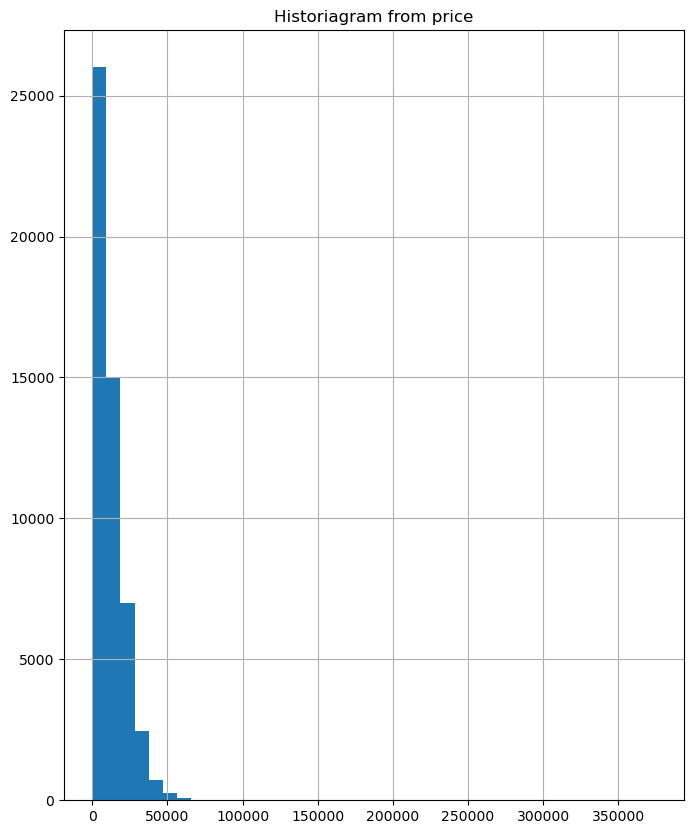

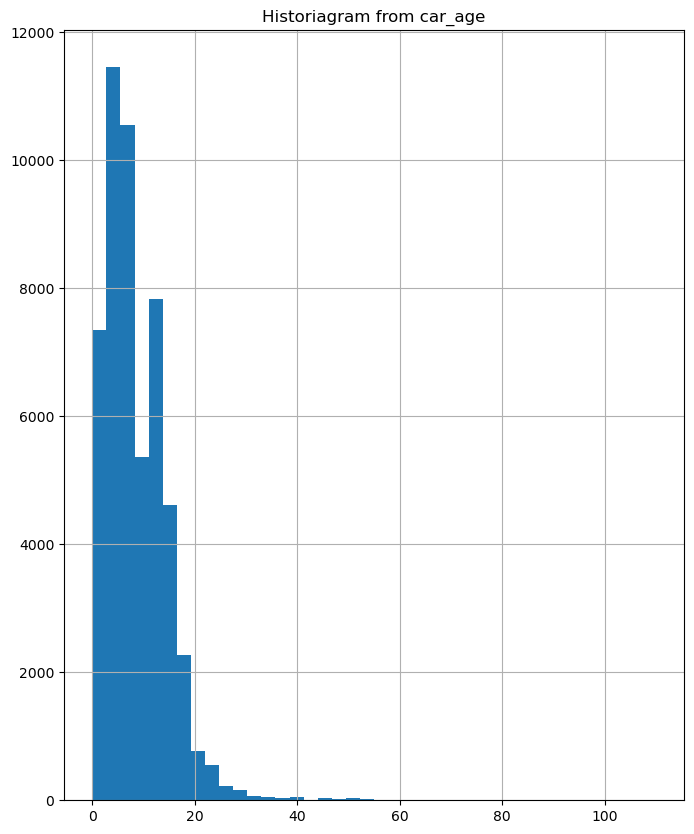

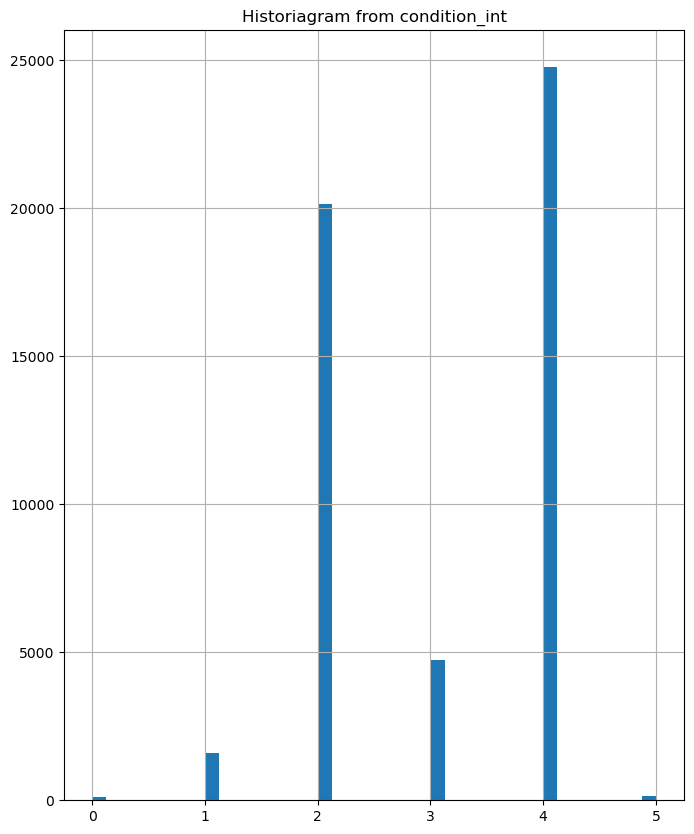

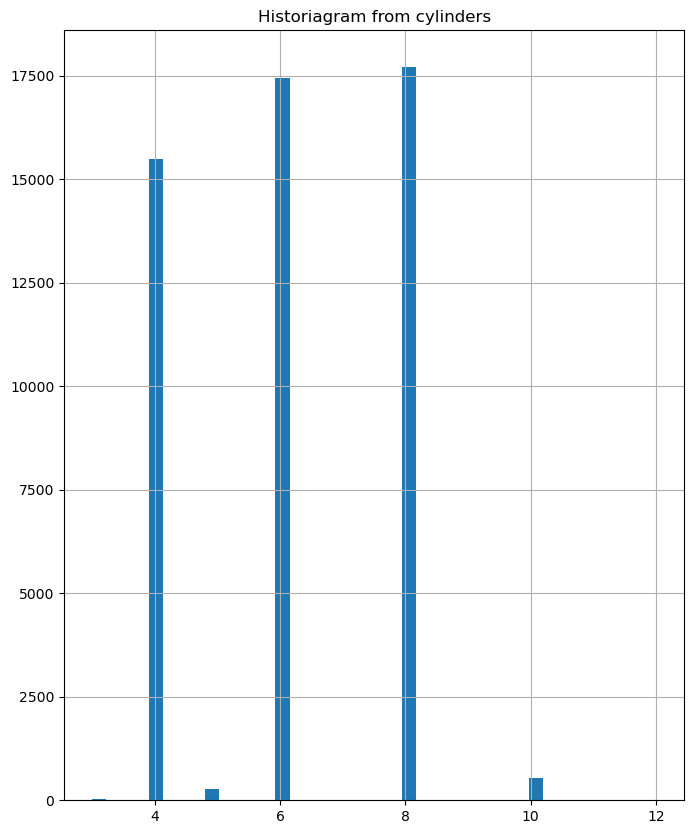

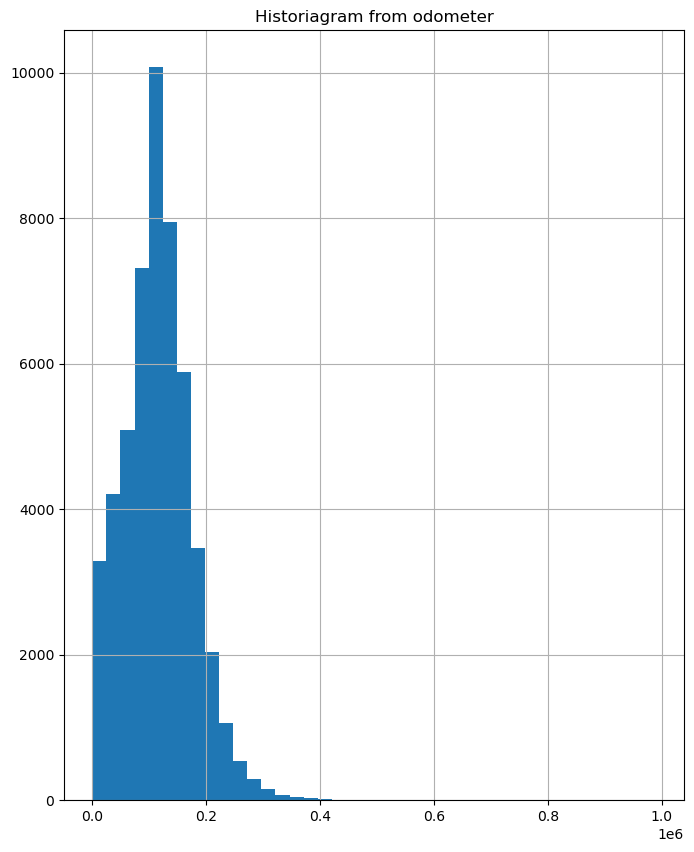

In [18]:
# 

parameters_to_analyze = ['price','car_age','condition_int','cylinders','odometer']

for datos in parameters_to_analyze:
    plt.figure(figsize=(8,10))
    plt.title(f'Historiagram from {datos}')
    df[datos].hist(bins=40)
    plt.show()

conclusión

se realiza un bucle for para realizar historiagramas de las columnas [price][car_age] [condition_int][cylinders][odometer]

El historiagrama de precio nos muestra la presencia de los datos que van desde 0 a 350000 siendo el valor más alto el valor que esta mas cerca de 0.

El historiagrama de car_age muestra el margen de años que tienen los carros, estando presente los valores que van de 0 hasta 100, sin embargo se aprecia visualmente que el valor mas alto se encuentra entre el 0 y 20.

El historiagrama de condition muestra los valores que conocemos para identificar que el valor con mayor presencia es el 4.

El historiagraa de cilindros muestra el número de cylindros de los vehículos demostrando que el valor con mayor presencia es el que cuenta con 8.

El historiagrama de odometro muestra los datos de odometer con formato le6 en la parte horizontal , siendo el valor que se inclina por 0.2 con mayor presencia.


## Estudio y tratamiento de valores atípicos

Analazing atipic data on data frame to change the perspective about histograms.

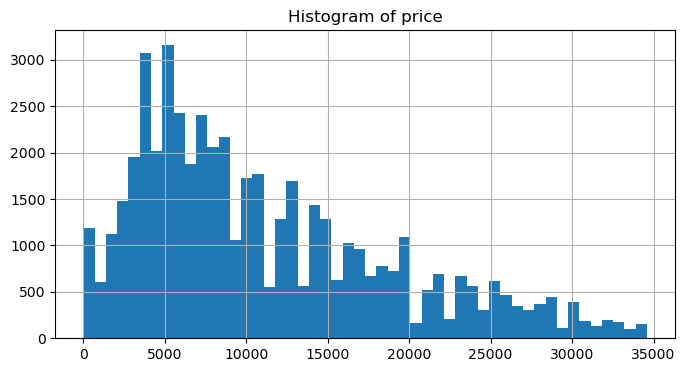

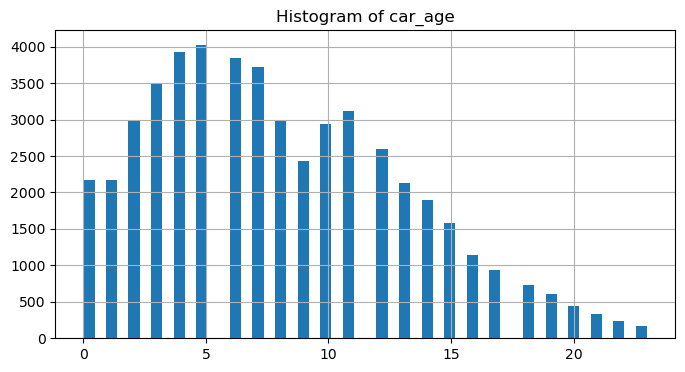

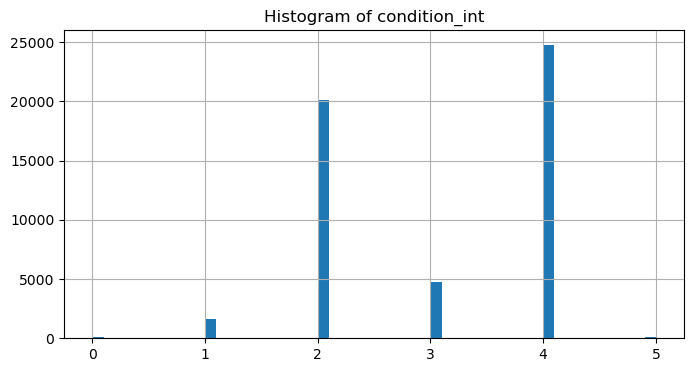

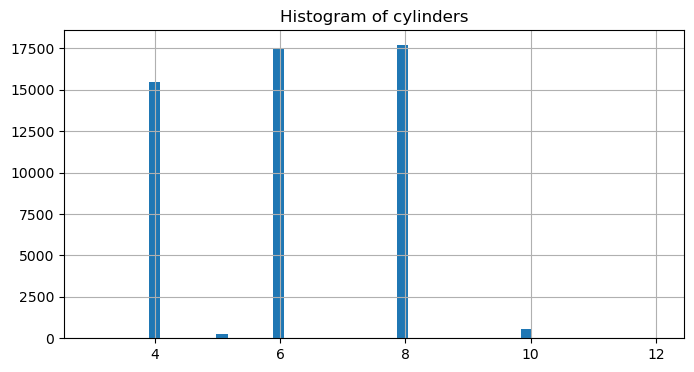

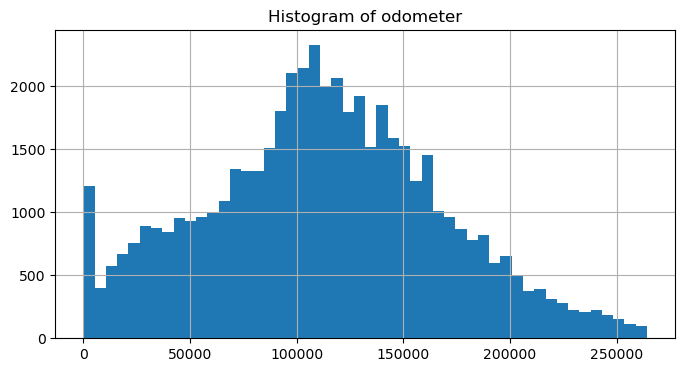

In [19]:
# Determina los límites inferiores para valores atípicos
# Determinar los límites superiores para valores atípicos
# Almacena los datos sin valores atípicos en un DataFrame separado


for data in parameters_to_analyze:
    
    
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outlier_data = df[data].quantile(q=0.95)
    plt.figure(figsize=(8, 4))
    plt.title(f"Histogram of {data}")
    df[(df[data] < limite_superior) & (df[data] > limite_inferior)][data].hist(bins=50)

    plt.show()
    





conclusión 

Se realizó un bucle for para hacer historiagramas de los parametros principales adjuntados en la variable parameteres to analyze ['price','car_age','condition_int','cylinders','odometer'], eliminando datos atípicos con ayuda de parametros inferiores y superiores calculados con los cuartiles de cada dato, así mismo para calcular el rango intercuartilario se restan los valores q1 -q3 , los limites que se utilizan son asignados a partir de esta variable, se crean las condiciones del historiagrama y se realizan.

Con lo realizados los datos visuales tienen mas sentido.

En el primer historiagrama se muestra el precio con mayor recurrencia , siendo el precio de 5000, con un declive hasta llegar a los 35000.

El historiograma de car age alcanza su punto máximo a los 5 años y baja en comparación a este hasta los más de 20.

El historiograma de condition  int tiene su punto máximo en el  número 4 y el más bajo el 5.

La visualización de cylinders muestra que el valor de 8 tiene mayor presencia y el que se encuentra entre el 4 y 6 el menor.

El odometro mantiene un punto alto en cerca de 100000 y declina hasta el 250000.



## Estudio de parámetros principales sin valores atípicos


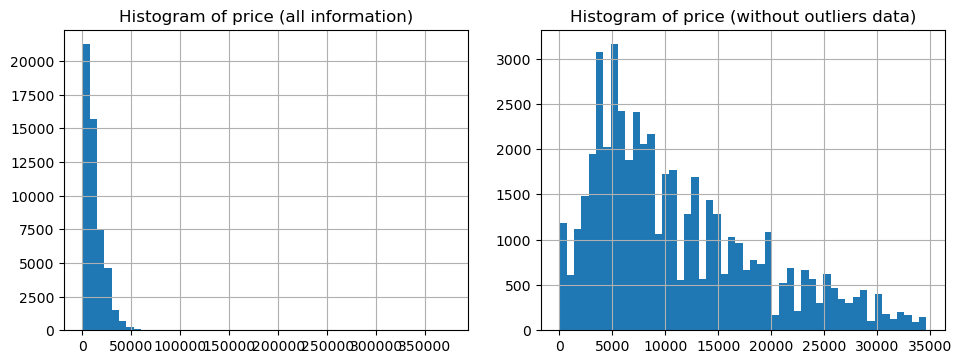

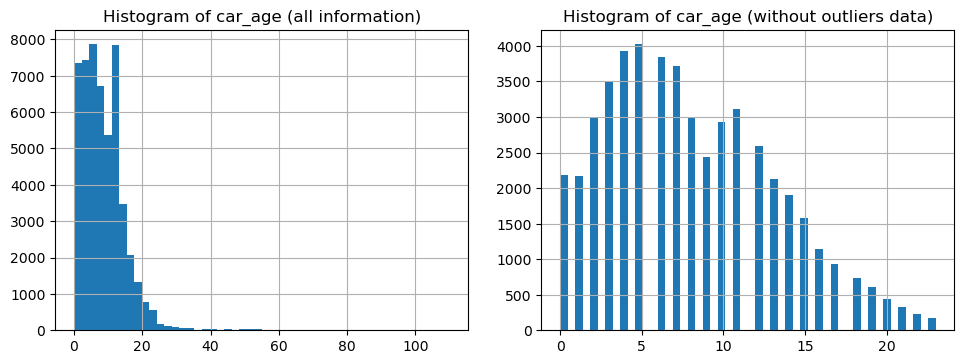

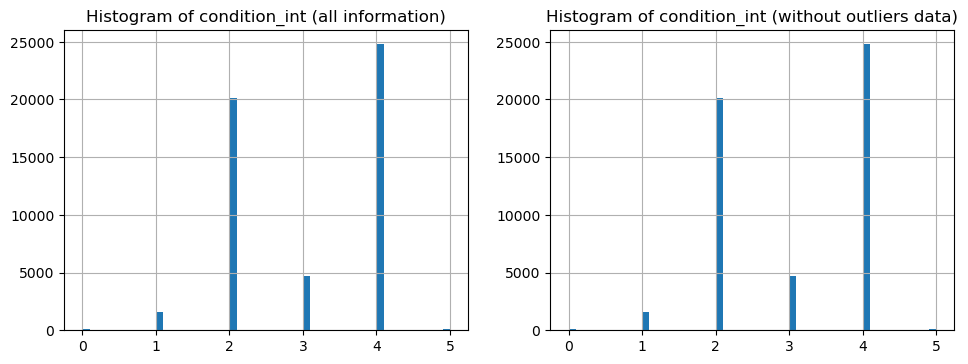

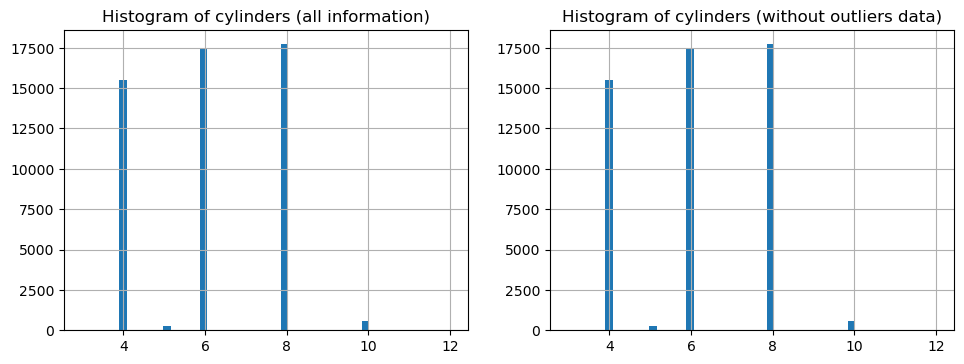

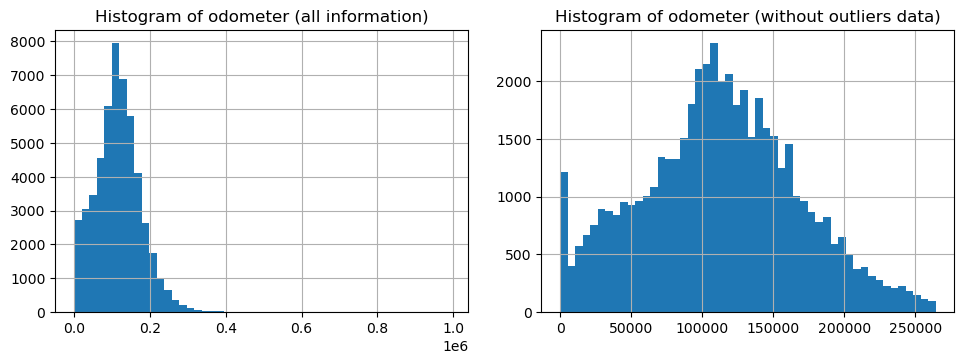

In [20]:


for data in parameters_to_analyze:
    fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
    
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    ax[0].set_title(f'Histogram of {data} (all information)')
    df[data].hist(bins=50, ax=ax[0])
    
    ax[1].set_title(f'Histogram of {data} (without outliers data)')
    filtered_data = df[(df[data] < limite_superior) & (df[data] > limite_inferior )]
    filtered_data[data].hist(bins=50, ax=ax[1])
    
    fig.tight_layout(pad=2.0)
    
    plt.show()

    

## Conclusiones de parámetros principales

Se crea un bucle for que verifica los parametros para analizar, calculando los limites inferioes y superiores, para mostrar la comparativa de dos historiogramas, a fin de mostrar los datos con datos atípicos y el otro sin estos.

<h3>Historiograma Price</h3>
1.- Como se habia menciona el precio en el historiagrama con datos atipicos demuestra que los datos llegan hasta 50000 , sin embargo, quitando los datos atípicos el rango se enfoca hasta 35000 , siendo estos mayormente centrados.
<p>
<h3>Historiograma car age</h3>
2.- Se demuestra visualmente que los datos que van desde 0 a 100 mantienen una presencia aproximada de 0 a 20 y más , mostrando su presencia más alta en el año 5 , debido a que, despúes de este los valores de recurrencia  bajan consecutivamente.
<p>
<h3>Historiograma condition</h3>
3.- La condición con mayor recurrencia es la 4 en las dos visualizaciones.
<p>
<h3>Historiograma cylinders</h3>
4.-Lo mismo pasa con cilindros, los cuales mantiene los datos en cuanto a recurrencia de datos.

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>
Luis, podes hacer esto en español como para seguir un hilo de todo el proyecto. Combinar idiomas a no ser que sea un pedido exclusivo, generalmente n oes una buena practica.
</div>

## Periodo de colocación de los anuncios


Calculating data without outlier with bucle for and describe method to improve the code with less proccess.

The results is filtered data frame to handle parameters betwent quantiles.

mean     39.56011
50%      33.00000
min       0.00000
max     271.00000
Name: days_listed, dtype: float64

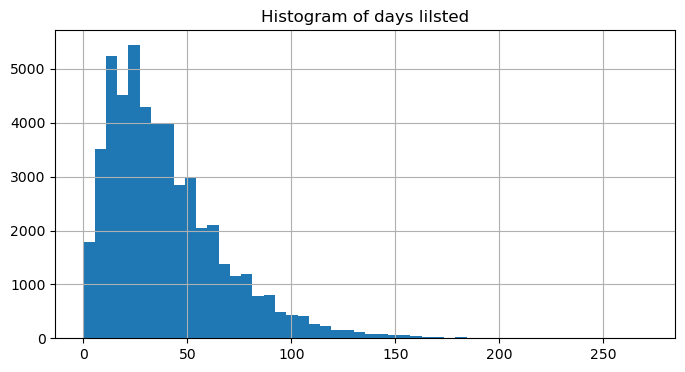

In [21]:
    


filtered_data = df.copy()

for datos in parameters_to_analyze:
    
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    filtered_data = filtered_data[(filtered_data[datos] < limite_superior)&(filtered_data[datos] > limite_inferior)]

plt.figure(figsize=(8, 4))
plt.title("Histogram of days lilsted")
filtered_data["days_listed"].hist(bins=50)

filtered_data["days_listed"].describe()[["mean", "50%",'min','max']]





In [22]:
print(df.shape,filtered_data.shape)

(51524, 19) (50740, 19)


Conclusión

se crea una copia del data frame original y a partir de estos se trabaja para quitar todos los límites inferiores y superiores de los datos a fin de tener una muestra de datos mayormente estructurada sin datos atípicos, la copia se hace como buena práctica para el análisis, seguido de esto se crea un hitoriograma con la columna [days_listed] y se aplica la funcion describe() para calcular el promedio, el cuartil 50% o segundo cuartil, el min y máximo.

El historiograma de days listed muestra que efectivamente el número de días entre el 0 y 50 es el que tiene más presencia, pudiendo ser el 33 que muestra la función describe().

## Precio promedio por cada tipo de vehículo


Se relizarán tres tipos de clasificación :
<br>
1.- Clasificacion de precio promedio por tipo de vehículo.
<br>
2.- Clasificación de cantidad de anuncions por cada tipo de vehículo.
<br>
3.- Clasificación por número de anuncios por precio promedio.
<br>


Con la finalidad de analizar los siguientes requerimientos:
- Número de anuncios y el precio promedio para cada tipo de vehículo.
- Dependencia de la cantidad de anuncions en cada tipo de vehículo.
- Verificar el precio promedio con mayor presencia.
- Extraer los dos vehículos con mayor número de anuncios.

,type,count,mean
0,SUV,12290,11213.194304
9,sedan,12069,6992.877455


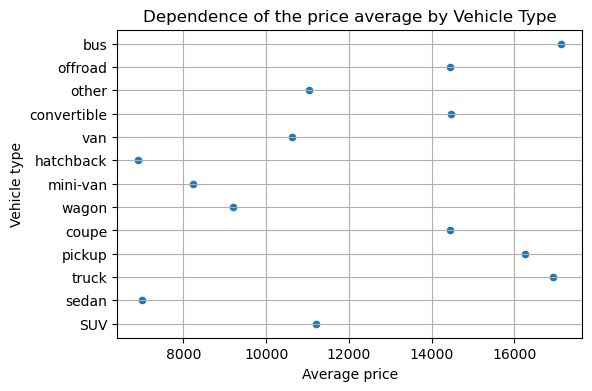

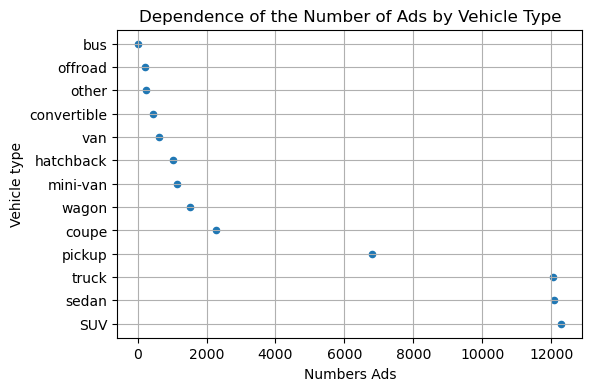

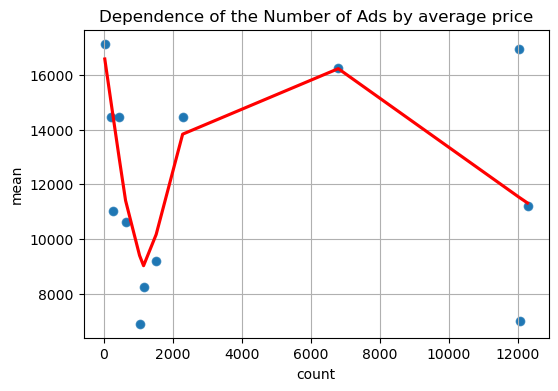

In [23]:


classification_by_type = (
    filtered_data
    .groupby("type")['price']
    .agg(['count','mean'])
    .reset_index()
    .sort_values(by="count", ascending=False)
    
)

classification_by_type.plot(kind="scatter", y="type", x="mean", figsize=(6, 4),grid=True,title="Dependence of the price average by Vehicle Type",ylabel='Vehicle type',xlabel="Average price")
classification_by_type.plot(kind='scatter',x='count',y='type',figsize=(6, 4),grid=True,title="Dependence of the Number of Ads by Vehicle Type",ylabel='Vehicle type',xlabel="Numbers Ads")
classification_by_type.plot(kind='scatter',x='count',y='mean',figsize=(6, 4),grid=True,title="Dependence of the Number of Ads by average price",ylabel='average price',xlabel="Numbers Ads")
sns.regplot(data=classification_by_type, x="count", y="mean", line_kws={"color": "red"}, lowess=True)


Top_2_data = classification_by_type.head(2)

Top_2_data



Conclusión

Se creo una agrupación por tipo de vehiculo y precio para calcular el número de anuncios y el precio promedio ordenados de forma descendente por el número de veces.

A través de la función plot, se hacen scatter para mostras en diferentes plots la información relacionada a los objetivos colocados en esta sección.

En el plot Dependence of the price average by vehicle type ,muestra la dependencia que existe entre el precio promedio y el tipo de vehiculo, observando que el que conserva un mayor precio promecio es el bus, truck  y pick up, mientras que los precios más baratos se conservan en el tipo ve vehículo hash back y sedan.

En el siguiente plot con nombre Dependen of the Number of Ads by Vehicle Type la menor dependencia es el tipo de vehiculo bus y la mayor dependencia son los tipos SUV, sedan y truck.

Por último el plot Dependen of the Number of Ads by average price muestra que el precio con mayor presencia es el cercano al 0 con una tendencia negativa como lo muestra la línea de regresión roja.

Los tipos de vehiculos con mayor presencia de anuncios son los SUV y los Sedán.

## Factores de precio





Se han tomado en cuenta dos grupos de factores los categoricos y los numericos, separandolos de la siguiente forma:

comparation_numeric = ['car_age','odometer','condition_int']
<br>
compatarion_categoric = ['transmission','paint_color']
<br>

En los númericos se utilizará un scatter plot y en los categoricos un box plot con la finalidad de visualizar adecuadamente los datos, para ello se utilizará un filtración de datos con el fin de integrar solo los datos de los dos tipos de autos que mas tienen anuncios.

,price,car_age,condition_int,average_mileage
price,1.000000,-0.496664,0.188734,-0.481953
car_age,-0.496664,1.000000,-0.246371,0.856054
condition_int,0.188734,-0.246371,1.000000,-0.228497
average_mileage,-0.481953,0.856054,-0.228497,1.000000


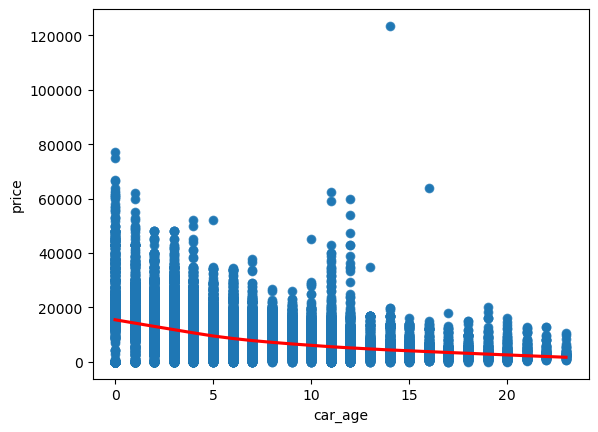

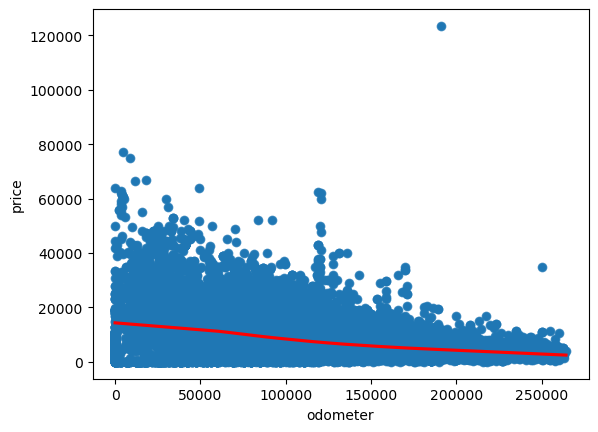

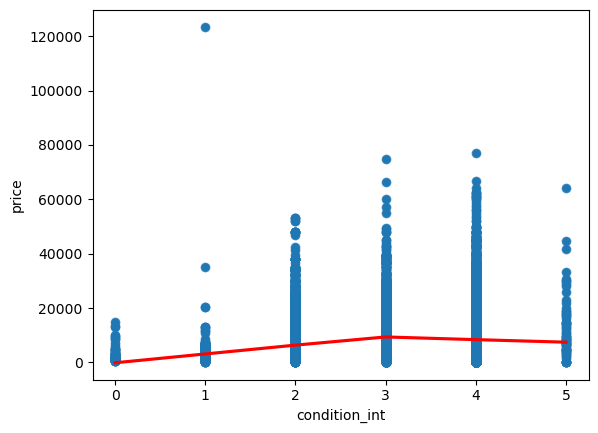

In [24]:
#[Utiliza matriz de correlación y diagramas de correlación]

comparation_numeric = ['car_age','odometer','condition_int']

Top_total_data = filtered_data[filtered_data['type'].isin(Top_2_data['type'])]

for data in comparation_numeric:
  
  Q1 = df[data].quantile(0.25)
  Q3 = df[data].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
    
  Top_total_data = Top_total_data[(Top_total_data[data] < limite_superior)&(Top_total_data[data] > limite_inferior)]
  Top_total_data.plot(kind='scatter',y='price',x=data)
  sns.regplot(data=Top_total_data, y="price", x=data, line_kws={"color": "red"}, lowess=True)


numeric_columns = ['price','car_age','condition_int','average_mileage']
corr_matrix = Top_total_data[numeric_columns].corr()
corr_matrix

Conclusión

Se crea la clasificación númerica para calcular los factores de precio en cuanto a car age , odometro y condición del carro.

En el primer gráfico muestra que el precio y los años del carro tienen una correlación negativa , es decir entre mas nuevo el carro , mayor es el precio, demostrado en las matrices de correlación.

La segunda visualización es en cuanto al precio y el promedio de millas por automovil, se tomó la decisión de tomar en cuenta esta variable debido a que los datos son tipo númericos, siendo estos de fácil manipulación para el estudio, demostrando que existe una correlación negativa, atribuyendo mayor credibilidad al primer gráfico.

El precio con la condición no muestra una correlación sin embargo su tendencia esta hacía lo positivo demostrando que la condición tres etiquetada como nuevo es buena para mantener un precio adecuado.

La matríz de correlación expone los datos anteriormente visualizados para tener un soporte númerico.

price    Axes(0.125,0.11;0.775x0.77)
dtype: object

<Figure size 1000x600 with 0 Axes>

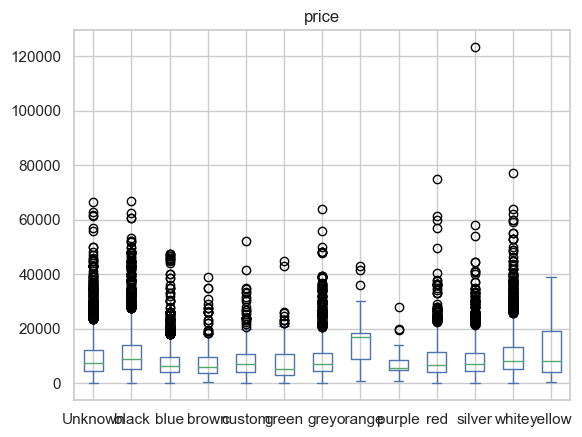

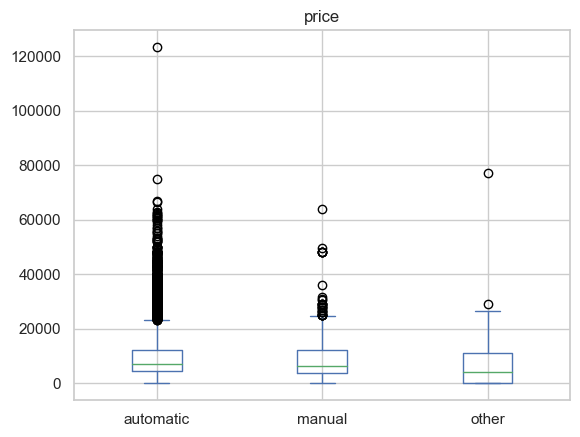

In [25]:

compatarion_categoric = ['transmission','paint_color']
#clasification by color
Top_data_by_color= (
  Top_total_data['paint_color']
  .value_counts()
  .reset_index()
  .rename(columns={"paint_color": "n_properties"})
  .rename(columns={"index": "paint_color"})
 
)
#clasification by transmission
Top_data_by_transmission= (
  Top_total_data['transmission']
  .value_counts()
  .reset_index()
  .rename(columns={"transmission": "n_properties"})
  .rename(columns={"index": "transmission"})
)

#clasification by color
data_color = Top_data_by_color[Top_data_by_color["n_properties"] > 50 ]
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

(
  Top_total_data[Top_total_data['paint_color'].isin(data_color['paint_color'])]
  .plot(kind="box",by="paint_color",column='price',grid=True)

)

(
  Top_total_data[Top_total_data['transmission'].isin(Top_data_by_transmission['transmission'])]
  .plot(kind="box",by="transmission",column='price',grid=True)
)




In [27]:
matrix_corr = Top_total_data.corr()
matrix_corr

C:\Users\wasa_\AppData\Local\Temp\ipykernel_12900\3287725179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = Top_total_data.corr()


,price,model_year,cylinders,is_4wd,days_listed,year,car_age,average_mileage,condition_int
price,1.000000,0.499181,0.187720,0.281050,-0.006284,0.011671,-0.496664,-0.481953,0.188734
model_year,0.499181,1.000000,-0.214505,-0.075326,-0.009144,0.019295,-0.995352,-0.860521,0.246959
cylinders,0.187720,-0.214505,1.000000,0.421836,0.011885,0.002559,0.214153,0.256885,-0.043347
is_4wd,0.281050,-0.075326,0.421836,1.000000,0.003360,0.001058,0.075217,0.091606,0.022376
days_listed,-0.006284,-0.009144,0.011885,0.003360,1.000000,0.006809,0.009775,0.013567,-0.004290
year,0.011671,0.019295,0.002559,0.001058,0.006809,1.000000,0.077082,-0.021456,-0.001050
car_age,-0.496664,-0.995352,0.214153,0.075217,0.009775,0.077082,1.000000,0.856054,-0.246371
average_mileage,-0.481953,-0.860521,0.256885,0.091606,0.013567,-0.021456,0.856054,1.000000,-0.228497
condition_int,0.188734,0.246959,-0.043347,0.022376,-0.004290,-0.001050,-0.246371,-0.228497,1.000000


Conclusión

Se realizó la clasificación de categoria en conjunto de datos.
Se crea un filtro para solo visualizar los datos de paint color mayores a 50 anuncios.
Se verifica que los datos de la columna paint color esten en la lista data color para recuperar sus datos y se visulizan los datos de paint color y price.

Seguido de esto se verifica los datos de transmision que se encuentra en la lista ordenada que se realizón , se verifican y visualizan en dos líneas.

Las cajas muestran que el color naranaja y amarillo son dos de los datos que mayormente tienen datos, así como el negro, demostrando que estos colores tiene un precio en promedio elevado.

En cuanto al precio en relacion con la transmision el factor other es el más barato al acercarse al cero, sin embargo el fator precio en cuanto automatico y manual se mantienen estables pero el manual tiene una tendencia a estar más barato.



## Conclusiones Generales





Exploración :

Los datos fueron explorados de forma general para analisar los tipos de datos que se manejan , así como los datos que contienen, con funciones como : head(), para simular algunas medidas generales con los datos númericos con describe() y verificar la existencia de datos nullos con la función combinada isna()sum().

Tratamiento de datos: 

Al explorarlos en primer termino se llegó a la conclusión de tratar los datos con diversas tecnicas de imputacion para los datos nullos, rellenando de forma sencilla los datos pertenencientes a las columnas [is_4wd] y [paint_color] a fin que estas tengan valores predeterminados con la funcion fillna.
El tratamiento de los valores de odometer se jerarquizaron a partir del promedio de los valores categorizados por modelo y condicion , las cuales fueron elegidas por no tener valores nulos y ser referentes adecuados para rellenar datos, junto con la incoporación de una función que permite rellenar los datos a partir del agrupamiento.

Los datos de modelo de año se rellena a través de un proceso similar, se realizan las agrupaciones pero , en este caso solamente se cuenta el número de modelos repetidos y agrupa estos por modelo , así mismo, se crea una función que permite verificar las filas qe no tienen el valor model year para que esta sea rellenada con los valores agrupados.

El datos de cylinders se rellena como modelo de año , debido a que es una columna que incorpora datos númericos.

Los datos que no llegan a rellenarse se rellenan con False predeterminados con la función fillna, a fin que todos los datos tengan valores.


Correpción de datos:

Se incorporan nuevos tipos de datos , debido a que, otorga un mejor manejo para las visualizaciones , así como a la hora de manejarlos.

La incorporación de mayor impacto es date posted a formato datetime que permite calcular y enriquecer los datos con los valores de día, mes y año posterioermente.

Enriquecimiento de datos:

Se enriquecen los datos  incorporando hora a date_posted, weekday, month y year por separado.
Se crea la columna age_year que permite calcular los años del automovil a la fecha de publicación del anuncio, lo cual es bueno para despues analizar dicha información y determine un enfoque adecuado.
Se crea un promedio de millas con un formato float que sirve para analizar el promedio de vehículos y tratar de relacionar con factores clave como el precio.

Al ser la condición del vehículo una pieza clave en el analisis , se crea otra de forma númerica para que sea fácil manejar y por ende incorporar los resultados de forma más efectiva.

La comporbación se realiza de forma inmediata para verificar si existen errores.

Parametros principales y tratamiento de valores atípicos:

Se eligen factores númericos para ser analizados a partir de la columnas ['price','car_age','condition_int','cylinders','odometer'] , con ayuda de historiogramas que permiten dar un vistazo rápido de los datos, se observa que hay datos atípicos por la distribución de la información visual, lo cual se decide a utilizar cuartiles para fijar una medida inferior con el cuartil 1 y una medida superior relacionada al cuartil 3 , se realizan los hitoriogramas pertinentes a ['price','car_age','condition_int','cylinders','odometer'] aplicando los cuartiles como medidas superiores e inferiores y se observa un gran cambio al quitarse los datos atípicos y tener una muestra más clara para las conclusiones, se crea la comparativa de forma visual verificando el cambio que sucede al ejecutar los cuartiles.

Periodo de colocación de los anuncios:

Se calcula el periodo de colocación de los anuncios creando una copia de el data frame principal a fin de ser utilizado para posteriores visualizaciones sin dañarlo de forma directa , ejecutando los cuartiles como límite superior e inferior y devolviendo dichos cuartiles por cada dato a la copia del data frame , se hace un historiograma de days listed para visualizar cual es el dato que tiene mayor presencia en cuanto a días, traducido a , cual es el número de días que usualmente tarda un anuncio, junto con la función describe() que permite clacular la mediana,la moda , el minímo y max, para corrobar los datos visualizados.

Se comparan los datos que se han eliminado por los cuartiles entre el data frame original y la copia.

Precio promedio por cada tipo de vehículo:

Se clafican los vehiculos por tipo , siendo las categorías de analisis, [precio y tipo de vehículo] , calculados  apartir de una agrupación incoporando el conteo y el calculo del promedio por tipo, se visualiza con una gráfico de dispersión , dando como resultado tres, price promedio por vehículo, numero de anuncioos por tipo de vehiculo y numeros de anuncios por precio promedio.

Se elige los gráficos de dispersion debido a que con este gráfico muestra la relación entre las variables de forma más efectiva.

Factores de precio:

De acuerdo al procesamiento y visualización de datos finales, se comparten las siguientes conclusiones:

1.- Los dos principales tipos de vehiculos que tienen mayor movimiento en postulaciones son los de tipos SUV y Sedán.

2.- Los tipos de vehículos en promedio son accesibles de precio , en comparación con los SUV los sedán son los vehículos más baratos.

3.- En el precio influye los años del automovil entre más nuevo el carro, el precio es mayor.

4.- La condición del automovil es un factor importante en el precio, debido a que entre mayormente luzca como nuevo puede subir o mantenerse.

5.- Los colores del automovil son esencialmente mas caros cuando se trata de colores extraños como lo es naranja y amarillo , pero el negro tiene un precio competitivo al igual que los dos anteriores.

5.- En cuanto al tipo de tansmisión los automaticos tienen mayor número de publicaciones con un rango de precio que no esta muy elevado en comparación con el manual.




